In [1]:
import scipy.stats
import numpy as np

In [2]:
prct = [0.01, 0.05, 0.95, 0.99]

VaR = scipy.stats.norm.ppf(prct)
print VaR

[-2.32634787 -1.64485363  1.64485363  2.32634787]


In [3]:
ES = scipy.stats.norm.pdf(VaR) / prct
print ES

[ 2.66521422  2.06271281  0.10856383  0.02692136]


In [4]:
ES = scipy.stats.norm.pdf(VaR)
mod_prct = map(lambda x: x if x < 0.5 else 1.-x, prct)
ES / mod_prct * np.sign(VaR)

array([-2.66521422, -2.06271281,  2.06271281,  2.66521422])

In [5]:
def VaR(q):
    return scipy.stats.norm.ppf(q)
    
def ES(q):
    var = VaR(q)
    mod_prct = map(lambda x: x if x < 0.5 else 1.-x, q)
    return scipy.stats.norm.pdf(var) / mod_prct * np.sign(var)

In [6]:
quantile = np.arange(0.8, 1., 0.002)

var_ = VaR(quantile)
es_ = ES(quantile)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


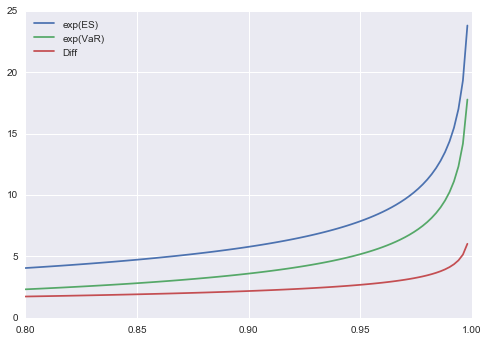

In [8]:
plt.plot(quantile, np.exp(es_), label='exp(ES)')
plt.plot(quantile, np.exp(var_), label='exp(VaR)')
plt.plot(quantile, np.exp(es_) - np.exp(var_), label='Diff')
plt.legend(loc="best")
plt.show()

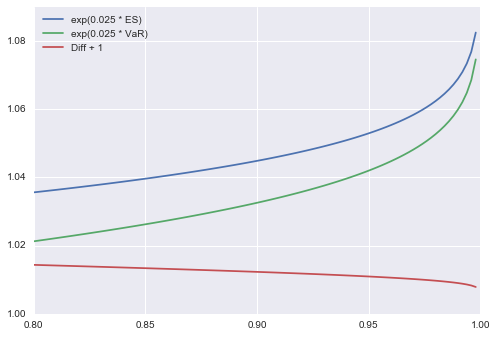

In [9]:
plt.plot(quantile, np.exp(0.025 * es_), label='exp(0.025 * ES)')
plt.plot(quantile, np.exp(0.025 * var_), label='exp(0.025 * VaR)')
plt.plot(quantile, np.exp(0.025 * es_) - np.exp(0.025 * var_) + 1, label='Diff + 1')
plt.legend(loc="best")
plt.show()

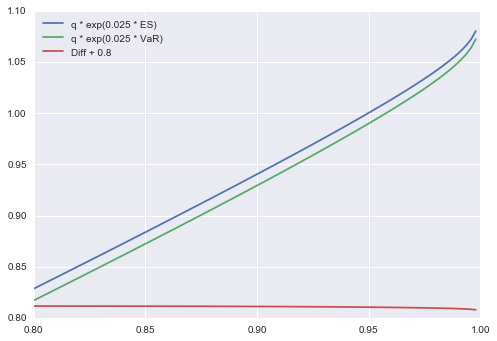

In [10]:
plt.plot(quantile, quantile * np.exp(0.025 * es_), label='q * exp(0.025 * ES)')
plt.plot(quantile, quantile * np.exp(0.025 * var_), label='q * exp(0.025 * VaR)')
plt.plot(quantile, quantile * (np.exp(0.025 * es_) - np.exp(0.025 * var_)) + 0.8, label='Diff + 0.8')
plt.legend(loc="best")
plt.show()

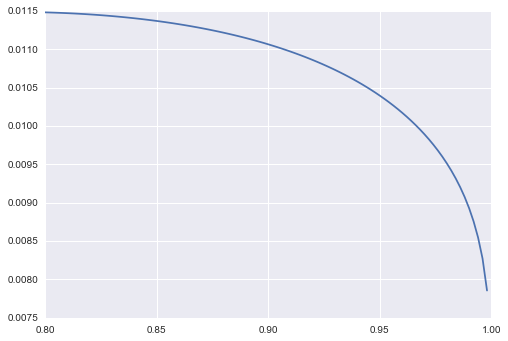

In [11]:
plt.plot(quantile, quantile * (np.exp(0.025 * es_) - np.exp(0.025 * var_)))
plt.show()

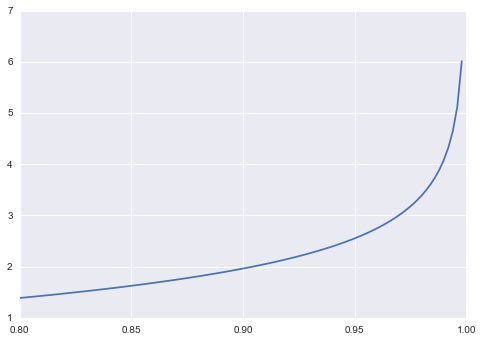

In [12]:
plt.plot(quantile, quantile * (np.exp(es_) - np.exp(var_)))
plt.show()